In [2]:
import numpy as np
import cv2
import os
from IPython.display import Image
import time
from matplotlib import pyplot as plt

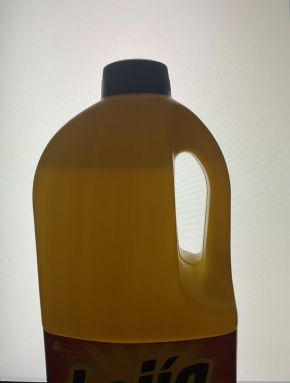

In [35]:
img = cv2.imread('imagen_base.jpg')



alto, ancho, canales = img.shape
ratio = 10
new_size = int(ancho/ratio), int(alto/ratio)
img_resized = cv2.resize(img_test, new_size, interpolation = cv2.INTER_AREA)
Image(cv2.imencode('.jpg', img_resized)[1])

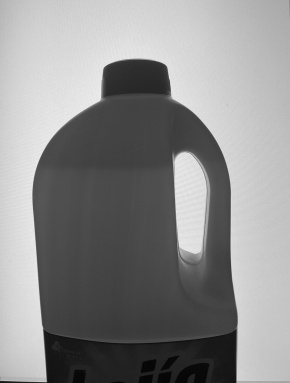

In [36]:
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
Image(cv2.imencode('.jpg', img_gray)[1])

--- 0.00101470947265625 seconds ---
Umbral aplicado: 134.0


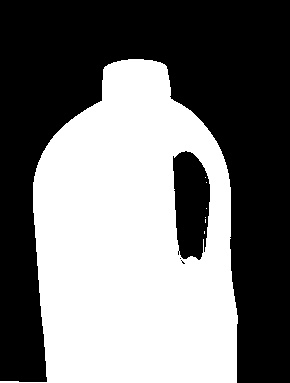

In [37]:
start_time = time.time()
umbral, img_segmentada = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print("--- %s seconds ---" % (time.time() - start_time))
print("Umbral aplicado:", umbral)

# Mostrar la imagen segmentada
Image(cv2.imencode('.jpg', img_segmentada)[1])

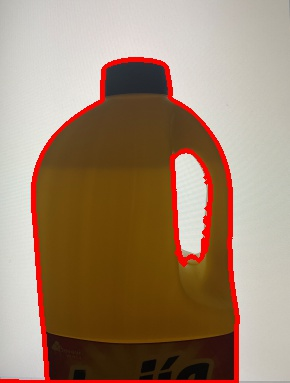

In [34]:
contours, hierarchy = cv2.findContours(img_segmentada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contourns = img_resized.copy()
cv2.drawContours(img_contourns, contours, -1, (0,0,255), 3)
Image(cv2.imencode('.jpg', img_contourns)[1])

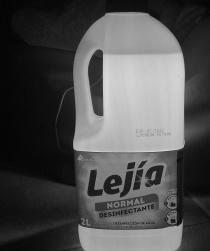

In [3]:
img2 = cv2.imread('imagen_recortada2.jpg')
alto, ancho, canales = img2.shape
ratio = 10
new_size = int(ancho/ratio), int(alto/ratio)
img_resized2 = cv2.resize(img2, new_size, interpolation = cv2.INTER_AREA)
img_gray2 = cv2.cvtColor(img_resized2, cv2.COLOR_BGR2GRAY)

#img_gray2 = cv2.GaussianBlur(img_gray2, (7, 7), 0)
Image(cv2.imencode('.jpg', img_gray2)[1])

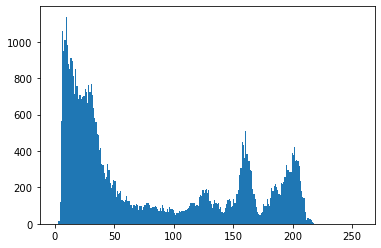

In [63]:
plt.hist(img_gray2.ravel(), 256,[0, 256]); plt.show()

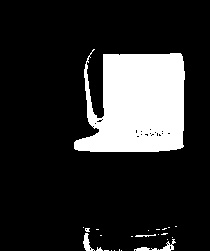

In [4]:
(T, img_threshold) = cv2.threshold(img_gray2, 165, 255, cv2.THRESH_BINARY)
Image(cv2.imencode('.jpg', img_threshold)[1])

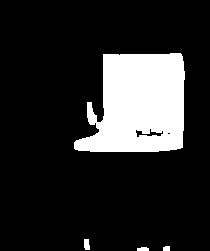

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_open = cv2.morphologyEx(img_threshold, cv2.MORPH_OPEN, kernel)
Image(cv2.imencode('.jpg', img_open)[1])

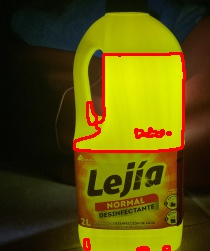

In [6]:
contours2, hierarchy = cv2.findContours(img_open, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contourns2 = img_resized2.copy()
cv2.drawContours(img_contourns2, contours2, -1, (0,0,255), 2)
Image(cv2.imencode('.jpg', img_contourns2)[1])

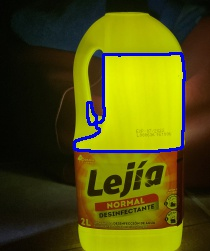

In [7]:
areas = [cv2.contourArea(contour) for contour in contours2]
(contours2, areas) = zip(*sorted(zip(contours2, areas), key=lambda a:a[1]))
# print contour with largest area
img_copy2 = img_resized2.copy()
cv2.drawContours(img_copy2, [contours2[-1]], -1, (255, 0, 0), 2)
Image(cv2.imencode('.jpg', img_copy2)[1])

In [11]:
Bigcontour = contours2[-1]
altura= min(Bigcontour[:,0,1])

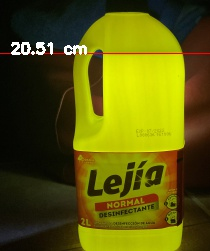

In [12]:
img_copy2 = img_resized2.copy()
largo, ancho, canales = img_copy2.shape

img_copy2[altura,:,:]=[0,0,255]
nivel=((largo-altura)/largo*26)

cv2.putText (img_copy2, (str(round(nivel,2))+" cm"),(10,altura), cv2.FONT_HERSHEY_SIMPLEX, 0.5,[255,255,255],2)
Image(cv2.imencode('.jpg', img_copy2)[1])